In [207]:
import pandas as pd
import functools

In [208]:
df=pd.read_csv("User_activity.txt")

In [209]:
df.head()


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447
0,device_id,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-14212,B-52-30970,B-52-15903,B-52-12407,B-52-22743,...,B-52-16131,B-52-50027,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-13395,B-52-8702,B-52-50977,B-52-48431
1,app_name,Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),Instagram (Mobile App),Yahoo Newsroom (Mobile App),Google Search (Mobile App),YouTube (Mobile App),...,Google Search (Mobile App),Facebook Messenger (Mobile App),Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),GroupMe (Mobile App),Instagram (Mobile App),YouTube (Mobile App)
2,minutes,27.9342,14.6664,439.7652,900.6606,17.3502,16.065,42.6006,90.1152,NaN,...,1.89,464.8644,27.9342,14.6664,439.7652,900.6606,1.1340000000000001,343.5264,0.9072,994.6692


In [210]:
df.shape

(3, 22449)

In [211]:
tdf = df.T

In [212]:
tdf.head()

,0,1,2
Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606


In [213]:
tdf.shape

(22449, 3)

In [214]:
tdf.columns = tdf.iloc[0]
tdf.drop(tdf.index[0],inplace=True)

In [215]:
tdf.head()

Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606
4,B-52-14212,Netflix (Mobile App),17.3502


In [216]:
tdf.loc[tdf.duplicated(), :]

Unnamed: 0,device_id,app_name,minutes
22440,B-52-23845,Snapchat (Mobile App),27.9342
22441,B-52-16587,Pinterest (Mobile App),14.6664
22442,B-52-36461,Facebook (Mobile App),439.7652
22443,B-52-29089,Yahoo Mail (Mobile App),900.6606
22444,B-52-13395,Netflix (Mobile App),1.1340000000000001
22445,B-52-8702,GroupMe (Mobile App),343.5264
22446,B-52-50977,Instagram (Mobile App),0.9072
22447,B-52-48431,YouTube (Mobile App),994.6692


In [217]:
tdf.drop_duplicates(inplace=True)

In [218]:
tdf.shape

(22440, 3)

In [219]:
df_list.append(tdf)

In [220]:
df2 = pd.read_csv("publishers.csv")

In [221]:
df2.head()

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites


In [222]:
df2.shape

(23, 2)

In [223]:
df2.loc[df2.duplicated(), :]

,app_name,Publisher
21,Walmart (Mobile App),Wal-Mart
22,Microsoft Word (Mobile App),Microsoft Sites


In [224]:
df2.drop_duplicates(inplace=True)

In [225]:
df2.shape

(21, 2)

In [226]:
df3 = pd.read_csv("device_demographics.csv")

In [227]:
df3.head()

,device_id,gender_id
0,B-52-23845,2.0
1,B-52-16587,1.0
2,B-52-36461,2.0
3,B-52-29089,2.0
4,B-52-14212,2.0


In [228]:
df3.loc[df3.duplicated(), :]

,device_id,gender_id


In [229]:
df3.shape

(2774, 2)

In [230]:

df_list.append(df3)

In [231]:
df_merged = pd.merge(tdf,df3, on = ['device_id'],how='inner')

In [232]:
df_merged.head (10)

,device_id,app_name,minutes,gender_id
0,B-52-23845,Snapchat (Mobile App),27.9342,2.0
1,B-52-23845,Pinterest (Mobile App),5.5188,2.0
2,B-52-23845,Instagram (Mobile App),867.132,2.0
3,B-52-23845,Tumblr (Mobile App),184.8042,2.0
4,B-52-23845,YouTube (Mobile App),69.6276,2.0
5,B-52-23845,Google Search (Mobile App),236.817,2.0
6,B-52-23845,Facebook Messenger (Mobile App),3147.4548,2.0
7,B-52-23845,Google Play (Mobile App),311.7744,2.0
8,B-52-16587,Pinterest (Mobile App),14.6664,1.0
9,B-52-16587,Google Play (Mobile App),406.5768,1.0


In [233]:
df_merged.shape

(22440, 4)

In [234]:
df_merged.loc[df_merged.duplicated(), :]

,device_id,app_name,minutes,gender_id


In [235]:
df_merged = pd.merge(df_merged,df2, on = ['app_name'],how='inner')

In [236]:
df_merged.head(10)

,device_id,app_name,minutes,gender_id,Publisher
0,B-52-23845,Snapchat (Mobile App),27.9342,2.0,"Snapchat, Inc"
1,B-52-36461,Snapchat (Mobile App),183.9348,2.0,"Snapchat, Inc"
2,B-52-29089,Snapchat (Mobile App),309.2418,2.0,"Snapchat, Inc"
3,B-52-30970,Snapchat (Mobile App),4.914,1.0,"Snapchat, Inc"
4,B-52-12407,Snapchat (Mobile App),306.5202,2.0,"Snapchat, Inc"
5,B-52-22743,Snapchat (Mobile App),70.5726,1.0,"Snapchat, Inc"
6,B-52-35112,Snapchat (Mobile App),700.6608,1.0,"Snapchat, Inc"
7,B-52-1957,Snapchat (Mobile App),168.1722,2.0,"Snapchat, Inc"
8,B-52-2964,Snapchat (Mobile App),734.265,1.0,"Snapchat, Inc"
9,B-52-36404,Snapchat (Mobile App),119.0322,2.0,"Snapchat, Inc"


In [237]:
df_merged.shape

(22440, 5)

In [238]:
df_merged.loc[df_merged.duplicated(), :]

,device_id,app_name,minutes,gender_id,Publisher


In [239]:
# Find which columns have empty values

nan_values = df_merged.isna()
nan_columns = nan_values.any()

columns_with_nan = df_merged.columns[nan_columns].tolist()
print(columns_with_nan)

['minutes', 'gender_id']


In [240]:
# Fill the minutes and the gender_id columns for missing values
df_merged.dtypes
df_merged['minutes']=df_merged['minutes'].astype(float)
df_merged['gender_id']=df_merged['gender_id'].astype(float)
#mean_minutes = df_merged['minutes'].mean()
df_merged['minutes'].fillna(int(df_merged['minutes'].mean()), inplace=True)

In [241]:
df_merged.dtypes
df_merged['gender_id'] = df_merged['gender_id'].fillna(df_merged['gender_id'].mode()[0])

In [242]:
df_merged.sort_values(by=['app_name','minutes'])

,device_id,app_name,minutes,gender_id,Publisher
19643,B-52-52155,Amazon Mobile (Mobile App),0.0378,2.0,Amazon Sites
18792,B-52-9082,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
20244,B-52-20729,Amazon Mobile (Mobile App),0.0756,1.0,Amazon Sites
20265,B-52-38817,Amazon Mobile (Mobile App),0.0756,2.0,Amazon Sites
19348,B-52-49381,Amazon Mobile (Mobile App),0.1134,2.0,Amazon Sites
...,...,...,...,...,...
4616,B-52-17233,YouTube (Mobile App),23128.3458,1.0,Google Sites
6691,B-52-51908,YouTube (Mobile App),23263.6320,2.0,Google Sites
5095,B-52-38266,YouTube (Mobile App),23436.7938,2.0,Google Sites
6278,B-52-48108,YouTube (Mobile App),27866.4246,2.0,Google Sites


Transformation 2:
Create an intermediate file (lookup file) using group by on column 'app_name' and
'Publisher' take the mode across gender id.

In [243]:
group_transform2 = df_merged.groupby(['app_name', 'Publisher']).gender_id.apply(lambda x: x.mode())
group_transform2

app_name                                    Publisher         
Amazon Mobile (Mobile App)                  Amazon Sites     0    2.0
Amazon Music with Prime Music (Mobile App)  Amazon Sites     0    2.0
Facebook (Mobile App)                       Facebook         0    2.0
Facebook Messenger (Mobile App)             Facebook         0    2.0
Google Play (Mobile App)                    Google Sites     0    2.0
Google Search (Mobile App)                  Google Sites     0    2.0
GroupMe (Mobile App)                        Microsoft Sites  0    2.0
Instagram (Mobile App)                      Facebook         0    2.0
Kindle (Mobile App)                         Amazon Sites     0    2.0
Microsoft Word (Mobile App)                 Microsoft Sites  0    2.0
Netflix (Mobile App)                        Netflix Inc.     0    2.0
Outlook (Mobile App)                        Microsoft Sites  0    2.0
Pinterest (Mobile App)                      Pinterest        0    2.0
Sam's Club (Mobile App)    

Transformation 3: Create another intermediate file (lookup file) using group by on column 'app_name'
and 'Publisher' take the median across minutes column id.

In [244]:
group_transfomr3= df_merged.groupby(['app_name', 'Publisher'])['minutes'].median()
group_transfomr3

app_name                                    Publisher      
Amazon Mobile (Mobile App)                  Amazon Sites         50.9544
Amazon Music with Prime Music (Mobile App)  Amazon Sites         36.9684
Facebook (Mobile App)                       Facebook           2614.3236
Facebook Messenger (Mobile App)             Facebook           1274.8239
Google Play (Mobile App)                    Google Sites         60.4800
Google Search (Mobile App)                  Google Sites        132.9237
GroupMe (Mobile App)                        Microsoft Sites      67.0383
Instagram (Mobile App)                      Facebook            271.5741
Kindle (Mobile App)                         Amazon Sites         26.3655
Microsoft Word (Mobile App)                 Microsoft Sites      12.3795
Netflix (Mobile App)                        Netflix Inc.        100.7370
Outlook (Mobile App)                        Microsoft Sites     108.8640
Pinterest (Mobile App)                      Pinterest           

In [245]:
df_merged.dtypes

device_id     object
app_name      object
minutes      float64
gender_id    float64
Publisher     object
dtype: object

In [246]:
grouped_single = df_merged.groupby('app_name').agg({'minutes': ['median', 'std']})
grouped_single

minutes             
                                               median          std
app_name                                                          
Amazon Mobile (Mobile App)                    50.9544   343.874805
Amazon Music with Prime Music (Mobile App)    36.9684   470.910181
Facebook (Mobile App)                       2614.3236  3282.044774
Facebook Messenger (Mobile App)             1274.8239  3043.994311
Google Play (Mobile App)                      60.4800   571.292751
Google Search (Mobile App)                   132.9237  1911.789378
GroupMe (Mobile App)                          67.0383   299.876883
Instagram (Mobile App)                       271.5741  1475.941953
Kindle (Mobile App)                           26.3655  1623.531496
Microsoft Word (Mobile App)                   12.3795   233.151920
Netflix (Mobile App)                         100.7370  2318.152000
Outlook (Mobile App)                         108.8640   533.033701
Pinterest (Mobile App)                       110.9241   635.125645
Sam's Club (Mobile App)                        9.2610   152.213462
Sam's Club Scan & Go (Mobile App)              3.3264    64.633239
Snapchat (Mobile App)                        230.0508  1042.856293
Tumblr (Mobile App)                          260.7444  2046.656000
Walmart (Mobile App)                          33.3018   218.604999
Yahoo Mail (Mobile App)                      183.5946   577.377802
Yahoo Newsroom (Mobile App)                   40.2948   463.159214
YouTube (Mobile App)                         228.4254  2291.435364

In [247]:
new = df_merged[['app_name', 'minutes'].copy()]

In [248]:
new.groupby('app_name').describe()

minutes                            \
                                             count         mean          std   
app_name                                                                       
Amazon Mobile (Mobile App)                  1625.0   169.084580   343.874805   
Amazon Music with Prime Music (Mobile App)   295.0   210.846256   470.910181   
Facebook (Mobile App)                       2455.0  3511.657119  3282.044774   
Facebook Messenger (Mobile App)             2522.0  2426.266214  3043.994311   
Google Play (Mobile App)                    2761.0   177.315106   571.292751   
Google Search (Mobile App)                  2638.0   521.606416  1911.789378   
GroupMe (Mobile App)                         170.0   185.307018   299.876883   
Instagram (Mobile App)                      1682.0   897.904614  1475.941953   
Kindle (Mobile App)                          336.0   562.954104  1623.531496   
Microsoft Word (Mobile App)                  220.0    83.942259   233.151920   
Netflix (Mobile App)                         807.0   833.267418  2318.152000   
Outlook (Mobile App)                         333.0   297.238393   533.033701   
Pinterest (Mobile App)                       938.0   372.246455   635.125645   
Sam's Club (Mobile App)                       53.0    51.321547   152.213462   
Sam's Club Scan & Go (Mobile App)             43.0    33.803749    64.633239   
Snapchat (Mobile App)                       1317.0   660.207648  1042.856293   
Tumblr (Mobile App)                          221.0   845.887724  2046.656000   
Walmart (Mobile App)                         747.0   108.953494   218.604999   
Yahoo Mail (Mobile App)                      630.0   408.755028   577.377802   
Yahoo Newsroom (Mobile App)                   89.0   169.465710   463.159214   
YouTube (Mobile App)                        2558.0  1015.534506  2291.435364   

                                                                           \
                                               min         25%        50%   
app_name                                                                    
Amazon Mobile (Mobile App)                  0.0378    11.15100    50.9544   
Amazon Music with Prime Music (Mobile App)  0.0378     3.62880    36.9684   
Facebook (Mobile App)                       0.0756  1061.00000  2614.3236   
Facebook Messenger (Mobile App)             0.0378   420.19425  1274.8239   
Google Play (Mobile App)                    0.1512    24.83460    60.4800   
Google Search (Mobile App)                  0.0378    18.31410   132.9237   
GroupMe (Mobile App)                        0.2268    16.25400    67.0383   
Instagram (Mobile App)                      0.0756    48.72420   271.5741   
Kindle (Mobile App)                         0.0378     2.31525    26.3655   
Microsoft Word (Mobile App)                 0.0756     2.70270    12.3795   
Netflix (Mobile App)                        0.0756     9.45000   100.7370   
Outlook (Mobile App)                        0.0756    33.22620   108.8640   
Pinterest (Mobile App)                      0.0378    17.41635   110.9241   
Sam's Club (Mobile App)                     0.3024     4.49820     9.2610   
Sam's Club Scan & Go (Mobile App)           0.0378     0.98280     3.3264   
Snapchat (Mobile App)                       0.0756    46.83420   230.0508   
Tumblr (Mobile App)                         0.0756    35.26740   260.7444   
Walmart (Mobile App)                        0.0378    11.58570    33.3018   
Yahoo Mail (Mobile App)                     0.0378    38.37645   183.5946   
Yahoo Newsroom (Mobile App)                 0.1134    11.71800    40.2948   
YouTube (Mobile App)                        0.0756    44.09370   228.4254   

                                                                    
                                                   75%         max  
app_name                                                            
Amazon Mobile (Mobile App)                   169.07940   5009.7096

In [249]:
new = df_merged[['app_name', 'gender_id', 'minutes']].copy()

In [250]:
new.groupby(['app_name','gender_id']).describe()

minutes               \
                                                       count         mean   
app_name                                   gender_id                        
Amazon Mobile (Mobile App)                 1.0         602.0   173.238187   
                                           2.0        1023.0   166.640326   
Amazon Music with Prime Music (Mobile App) 1.0          96.0   179.297350   
                                           2.0         199.0   226.065828   
Facebook (Mobile App)                      1.0         897.0  3338.818298   
                                           2.0        1558.0  3611.167017   
Facebook Messenger (Mobile App)            1.0         910.0  2424.074135   
                                           2.0        1612.0  2427.503679   
Google Play (Mobile App)                   1.0        1015.0   159.886102   
                                           2.0        1746.0   187.447087   
Google Search (Mobile App)                 1.0         966.0   558.302659   
                                           2.0        1672.0   500.405118   
GroupMe (Mobile App)                       1.0          56.0   181.977300   
                                           2.0         114.0   186.942668   
Instagram (Mobile App)                     1.0         601.0   932.656328   
                                           2.0        1081.0   878.583818   
Kindle (Mobile App)                        1.0         123.0   601.473467   
                                           2.0         213.0   540.710529   
Microsoft Word (Mobile App)                1.0          72.0    59.573736   
                                           2.0         148.0    95.797216   
Netflix (Mobile App)                       1.0         285.0   827.469686   
                                           2.0         522.0   836.432847   
Outlook (Mobile App)                       1.0         111.0   290.468333   
                                           2.0         222.0   300.623423   
Pinterest (Mobile App)                     1.0         317.0   365.345498   
                                           2.0         621.0   375.769166   
Sam's Club (Mobile App)                    1.0          16.0   125.807338   
                                           2.0          37.0    19.111476   
Sam's Club Scan & Go (Mobile App)          1.0          10.0    50.504580   
                                           2.0          33.0    28.742891   
Snapchat (Mobile App)                      1.0         467.0   652.198751   
                                           2.0         850.0   664.607830   
Tumblr (Mobile App)                        1.0          88.0   740.432041   
                                           2.0         133.0   915.662913   
Walmart (Mobile App)                       1.0         251.0   120.278101   
                                           2.0         496.0   103.222695   
Yahoo Mail (Mobile App)                    1.0         224.0   426.465815   
                                           2.0         406.0   398.983559   
Yahoo Newsroom (Mobile App)                1.0          26.0   136.755408   
                                           2.0          63.0   182.965200   
YouTube (Mobile App)                       1.0         948.0  1064.897360   
                                           2.0        1610.0   986.468677   

                                                                           \
                                                              std     min   
app_name                                   gender_id                        
Amazon Mobile (Mobile App)                 1.0         344.756103  0.0756   
                                           2.0         343.500443  0.0378   
Amazon Music with Prime Music (Mobile App) 1.0         313.866983  0.0378   
                                           2.0         530.370786  0.0756   
Facebook (Mobile App)                      1.0  

In [251]:
df_merged.head()

,device_id,app_name,minutes,gender_id,Publisher
0,B-52-23845,Snapchat (Mobile App),27.9342,2.0,"Snapchat, Inc"
1,B-52-36461,Snapchat (Mobile App),183.9348,2.0,"Snapchat, Inc"
2,B-52-29089,Snapchat (Mobile App),309.2418,2.0,"Snapchat, Inc"
3,B-52-30970,Snapchat (Mobile App),4.9140,1.0,"Snapchat, Inc"
4,B-52-12407,Snapchat (Mobile App),306.5202,2.0,"Snapchat, Inc"


In [252]:
df_new = df_merged.groupby(['app_name']).agg({'minutes':'sum','device_id':'count'}).reset_index()
df_new['Avg_time_spend_per_device']=df_new['minutes']/df_new['device_id']
df_new=df_new.rename({'minutes':'total_minutes','device_id':'total_devices'
        }, axis='columns')
df_new

,app_name,total_minutes,total_devices,Avg_time_spend_per_device
0,Amazon Mobile (Mobile App),2.747624e+05,1625,169.084580
1,Amazon Music with Prime Music (Mobile App),6.219965e+04,295,210.846256
2,Facebook (Mobile App),8.621118e+06,2455,3511.657119
3,Facebook Messenger (Mobile App),6.119043e+06,2522,2426.266214
4,Google Play (Mobile App),4.895670e+05,2761,177.315106
5,Google Search (Mobile App),1.375998e+06,2638,521.606416
6,GroupMe (Mobile App),3.150219e+04,170,185.307018
7,Instagram (Mobile App),1.510276e+06,1682,897.904614
8,Kindle (Mobile App),1.891526e+05,336,562.954104
9,Microsoft Word (Mobile App),1.846730e+04,220,83.942259


In [253]:
df_new['Rank (Duration Based)']=df_new['Avg_time_spend_per_device'].rank(ascending=False)
df_new['Rank (User Based)']=df_new['total_devices'].rank(ascending=False)
df_new

,app_name,total_minutes,total_devices,Avg_time_spend_per_device,Rank (Duration Based),Rank (User Based)
0,Amazon Mobile (Mobile App),2.747624e+05,1625,169.084580,17.0,7.0
1,Amazon Music with Prime Music (Mobile App),6.219965e+04,295,210.846256,13.0,15.0
2,Facebook (Mobile App),8.621118e+06,2455,3511.657119,1.0,5.0
3,Facebook Messenger (Mobile App),6.119043e+06,2522,2426.266214,2.0,4.0
4,Google Play (Mobile App),4.895670e+05,2761,177.315106,15.0,1.0
5,Google Search (Mobile App),1.375998e+06,2638,521.606416,9.0,2.0
6,GroupMe (Mobile App),3.150219e+04,170,185.307018,14.0,18.0
7,Instagram (Mobile App),1.510276e+06,1682,897.904614,4.0,6.0
8,Kindle (Mobile App),1.891526e+05,336,562.954104,8.0,13.0
9,Microsoft Word (Mobile App),1.846730e+04,220,83.942259,19.0,17.0


In [254]:
df_publisher = df_merged.groupby(['Publisher']).agg({'device_id':'count'}).reset_index()
df_publisher= df_publisher.rename({'device_id':'total_devices'
        }, axis='columns')
df_publisher['Rank']=df_publisher['total_devices'].rank(ascending=False)
df_publisher

,Publisher,total_devices,Rank
0,Amazon Sites,2256,3.0
1,Facebook,6659,2.0
2,Google Sites,7957,1.0
3,Microsoft Sites,723,9.0
4,Netflix Inc.,807,8.0
5,Oath,940,5.0
6,Pinterest,938,6.0
7,"Snapchat, Inc",1317,4.0
8,Wal-Mart,843,7.0


<AxesSubplot:ylabel='Avg_time_spend_per_device'>

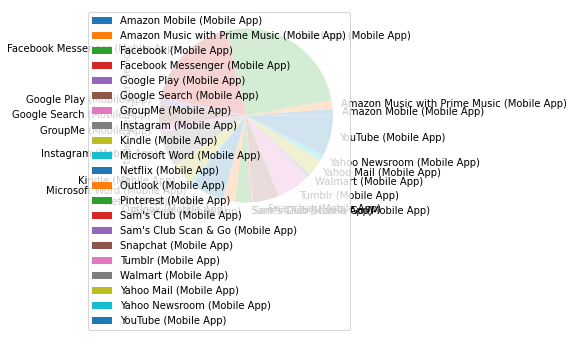

In [255]:
df_new.groupby(['app_name']).sum().plot(kind='pie', y='Avg_time_spend_per_device')

<AxesSubplot:ylabel='app_name,gender_id'>

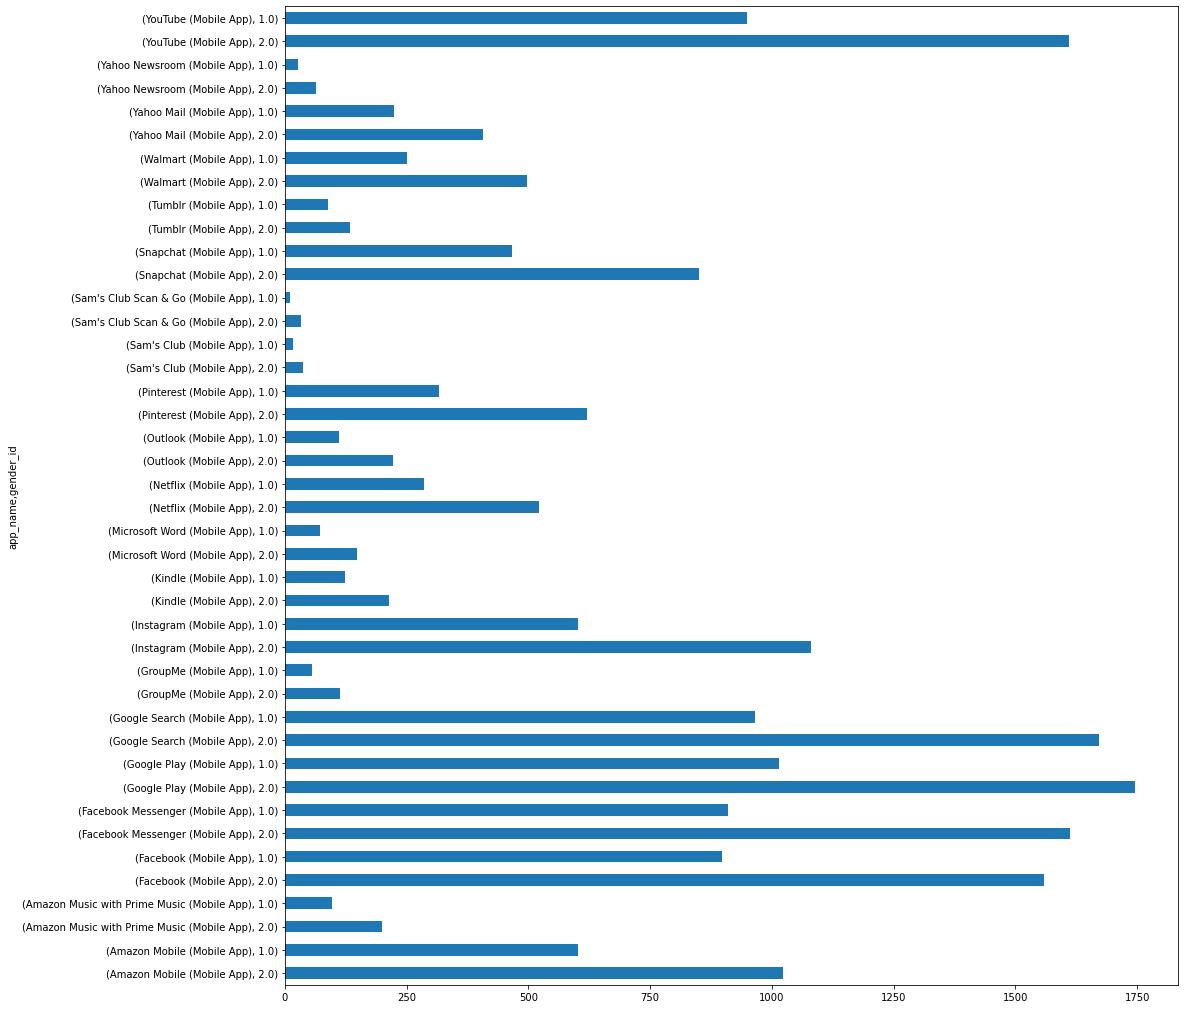

In [256]:
df_merged.groupby('app_name')['gender_id'].value_counts().plot.barh(figsize=(16,18))
                                                                            